In [1]:
import pandas as pd
import numpy as np

In [2]:
print(pd.__version__)
print(np.__version__)

1.1.3
1.19.3


In [19]:
df = pd.read_csv('LBW_Dataset.csv')

In [4]:
df.describe()

,Community,Age,Weight,Delivery phase,HB,IFA,BP,Education,Residence,Result
count,96.000000,89.000000,85.000000,92.000000,77.000000,96.000000,81.000000,93.0,94.000000,96.000000
mean,2.177083,23.752809,45.129412,1.021739,9.076623,0.687500,1.725189,5.0,1.138298,0.750000
std,1.213909,3.321011,8.215532,0.146630,0.788052,0.465946,1.449447,0.0,0.347063,0.435286
min,1.000000,17.000000,30.000000,1.000000,5.900000,0.000000,1.200000,5.0,1.000000,0.000000
25%,1.000000,21.000000,40.000000,1.000000,8.900000,0.000000,1.375000,5.0,1.000000,0.750000
50%,2.500000,24.000000,43.000000,1.000000,9.000000,1.000000,1.500000,5.0,1.000000,1.000000
75%,3.000000,26.000000,50.000000,1.000000,9.200000,1.000000,1.661538,5.0,1.000000,1.000000
max,4.000000,38.000000,65.000000,2.000000,11.000000,1.000000,13.875000,5.0,2.000000,1.000000


In [22]:
df.isnull().sum()

Community         0
Age               0
Weight            0
Delivery phase    0
HB                0
IFA               0
BP                0
Education         0
Residence         0
Result            0
dtype: int64

In [20]:
medianAge = df['Age'].median()
meanWt = int(df['Weight'].mean())
medianDP = df.mode()['Delivery phase'][0]
medianHB = df['HB'].median()
meanBP = df['BP'].median()
education = df.mode()['Education'][0]
residence = df.mode()['Residence'][0]

print(medianAge)
print(meanWt)
print(medianDP)
print(medianHB)
print(meanBP)
print(education)
print(residence)


24.0
45
1.0
9.0
1.5
5.0
1.0


In [21]:
df['Age'].fillna(value=medianAge, inplace=True)
df['Weight'].fillna(value=meanWt, inplace=True)
df['Delivery phase'].fillna(value=medianDP, inplace=True)
df['HB'].fillna(value=medianHB, inplace=True)
df['BP'].fillna(value=meanBP, inplace=True)
df['Education'].fillna(value=education, inplace=True)
df['Residence'].fillna(value=residence, inplace=True)

In [18]:
modDF = df
modDF.to_csv('modifiedLBW.csv', index=False

In [8]:
newdf = df[['Age', 'Weight', 'HB', 'BP']]
newdf

,Age,Weight,HB,BP
0,21.0,42.0,9.2,1.375
1,21.0,45.0,8.8,1.500
2,21.0,45.0,9.2,2.125
3,21.0,45.0,8.0,1.375
4,24.0,33.0,9.3,1.571
...,...,...,...,...
91,21.0,55.0,9.0,1.375
92,24.0,39.0,8.4,1.500
93,24.0,50.0,9.0,1.375
94,24.0,38.0,9.0,1.500


In [11]:
normalized_df=(newdf-newdf.mean())/newdf.std()
normalized_df
normalized_df.mean()
normalized_df.std()


Age       1.0
Weight    1.0
HB        1.0
BP        1.0
dtype: float64

In [16]:
df.to_csv('Final_LBW.csv', index=False)

In [14]:
df[['Age', 'Weight', 'HB', 'BP']] = normalized_df[['Age', 'Weight', 'HB', 'BP']]
print(df)


    Community       Age    Weight  Delivery phase        HB  IFA        BP  \
0           1 -0.866706 -0.403163             1.0  0.196367    1 -0.236375   
1           1 -0.866706 -0.014832             1.0 -0.370588    1 -0.142577   
2           1 -0.866706 -0.014832             1.0  0.196367    1  0.326417   
3           1 -0.866706 -0.014832             1.0 -1.504500    1 -0.236375   
4           1  0.071682 -1.568154             1.0  0.338106    1 -0.089299   
..        ...       ...       ...             ...       ...  ...       ...   
91          3 -0.866706  1.279603             1.0 -0.087110    0 -0.236375   
92          3  0.071682 -0.791493             2.0 -0.937544    0 -0.142577   
93          3  0.071682  0.632385             1.0 -0.087110    0 -0.236375   
94          1  0.071682 -0.920937             1.0 -0.087110    0 -0.142577   
95          3 -0.866706  0.632385             1.0 -0.087110    1 -0.236375   

    Education  Residence  Result  
0         5.0        1.0    

Standardization

In [3]:
df = pd.read_csv('modifiedLBW.csv')

In [28]:
def normalize(mat):
   # print(mat)
   mat -= mat.mean(1)
   # print(mat.mean(1))
   mat /= mat.std(1)
   # print(mat[0].mean())
   print("Mean", mat[0])


In [4]:
weight = np.asarray(df['Weight'].values)
weight -= np.mean(weight)
weight /= np.std(weight)
print(weight)
weight.mean()
print(np.std(weight))


# norm = np.linalg.norm(weight)
# normal_array = weight/norm
# print(normal_array.mean())

[-0.40527892 -0.01490993 -0.01490993 -0.01490993 -1.5763859  -1.31613991
 -1.8366319  -1.9667549  -1.9667549  -0.01490993 -0.92577091 -1.7065089
 -0.01490993 -1.5763859  -0.01490993 -0.79564791 -0.01490993 -0.66552492
 -0.66552492 -0.01490993 -0.01490993 -0.01490993 -0.01490993 -0.01490993
  0.50558206 -0.66552492 -0.66552492 -0.01490993  0.37545907  1.93693504
 -1.05589391  0.37545907  0.63570506 -1.31613991 -0.66552492  2.58755003
  0.37545907  1.28632005 -0.79564791 -0.66552492 -0.66552492 -0.27515592
 -0.79564791  2.45742703 -0.66552492 -0.01490993  0.89595106 -1.31613991
 -0.40527892  1.15619705 -0.66552492 -0.66552492 -0.27515592  0.11521307
  0.50558206  2.19718104 -0.66552492 -0.53540192  1.93693504  1.93693504
 -0.66552492 -0.53540192  1.28632005  0.76582806  0.89595106  0.76582806
  0.63570506 -0.27515592 -0.66552492 -0.14503292 -0.14503292  1.41644305
  1.93693504 -0.66552492  0.63570506 -0.27515592  2.32730404  0.11521307
 -0.27515592  1.93693504  0.37545907 -0.79564791 -0.

In [30]:
mat = np.matrix([df['Weight'].values, df['HB'].values])
print(mat)
mat.mean(1)


[[42.  45.  45.  45.  33.  35.  31.  30.  30.  45.  38.  32.  45.  33.
  45.  39.  45.  40.  40.  45.  45.  45.  45.  45.  49.  40.  40.  45.
  48.  60.  37.  48.  50.  35.  40.  65.  48.  55.  39.  40.  40.  43.
  39.  64.  40.  45.  52.  35.  42.  54.  40.  40.  43.  46.  49.  62.
  40.  41.  60.  60.  40.  41.  55.  51.  52.  51.  50.  43.  40.  44.
  44.  56.  60.  40.  50.  43.  63.  46.  43.  60.  48.  39.  40.  43.
  44.  52.  45.  42.  48.  40.  49.  55.  39.  50.  38.  50. ]
 [ 9.2  8.8  9.2  8.   9.3  9.2  9.   9.   9.   9.9  9.   9.   9.  10.
   8.9  9.   9.   9.   9.   9.6  9.   8.   9.4  9.   8.9  8.7  9.5  9.
   9.6  9.   9.   9.   9.2  8.9  9.1  9.   9.6  9.   8.9  9.   8.9  9.
   8.9  8.8  9.2  9.3  8.4  9.2  9.2  8.9  9.2  8.9  9.2  6.2  9.4  9.
   9.2  9.   9.2 10.9  7.9  9.1  8.   8.   8.8 10.8  9.2 10.2  9.3 10.4
  11.   8.4 10.  11.   5.9  9.   8.9  9.   9.2  9.2  9.2  9.   9.   9.
   9.   9.   9.   9.   9.   9.   9.1  9.   8.4  9.   9.   9. ]]


matrix([[45.11458333],
        [ 9.06145833]])

In [31]:
mat.std(1)

matrix([[7.68503659],
        [0.70183833]])

In [32]:
normalize(mat)

Mean [[-0.40527892 -0.01490993 -0.01490993 -0.01490993 -1.5763859  -1.31613991
  -1.8366319  -1.9667549  -1.9667549  -0.01490993 -0.92577091 -1.7065089
  -0.01490993 -1.5763859  -0.01490993 -0.79564791 -0.01490993 -0.66552492
  -0.66552492 -0.01490993 -0.01490993 -0.01490993 -0.01490993 -0.01490993
   0.50558206 -0.66552492 -0.66552492 -0.01490993  0.37545907  1.93693504
  -1.05589391  0.37545907  0.63570506 -1.31613991 -0.66552492  2.58755003
   0.37545907  1.28632005 -0.79564791 -0.66552492 -0.66552492 -0.27515592
  -0.79564791  2.45742703 -0.66552492 -0.01490993  0.89595106 -1.31613991
  -0.40527892  1.15619705 -0.66552492 -0.66552492 -0.27515592  0.11521307
   0.50558206  2.19718104 -0.66552492 -0.53540192  1.93693504  1.93693504
  -0.66552492 -0.53540192  1.28632005  0.76582806  0.89595106  0.76582806
   0.63570506 -0.27515592 -0.66552492 -0.14503292 -0.14503292  1.41644305
   1.93693504 -0.66552492  0.63570506 -0.27515592  2.32730404  0.11521307
  -0.27515592  1.93693504  0.37545

In [19]:
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'sklearn'

In [22]:
import matplotlib.pyplot as plt

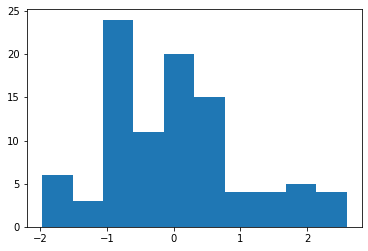

In [24]:
plt.hist(weight)
plt.show()